In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [43]:
start = '2012-01-01'
# because the use of Deep learning really hit off in 2012
end = '2023-12-31'
 
df = pdr.get_data_yahoo('AAPL',start,end)
df.head()
# will later be dynamic 



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400


In [44]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...,...
3013,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
3014,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
3015,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
3016,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900


In [45]:
df = df.drop(['Date','Adj Close'],axis = 1)
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
3013,195.179993,195.410004,192.970001,193.600006,37122800
3014,193.610001,193.889999,192.830002,193.050003,28919300
3015,192.490005,193.500000,191.089996,193.149994,48087700
3016,194.139999,194.660004,193.169998,193.580002,34049900


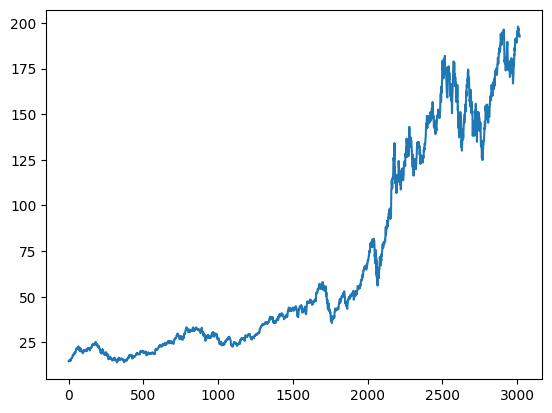

In [46]:
# further, make other feautures accessible as well 
plt.plot(df.Close)

In [47]:
ma100 = df.Close.rolling(100).mean()

In [48]:
# exponential moving average 
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3013    178.649100
3014    178.871851
3015    179.085250
3016    179.290201
3017    179.487900
Name: Close, Length: 3018, dtype: float64

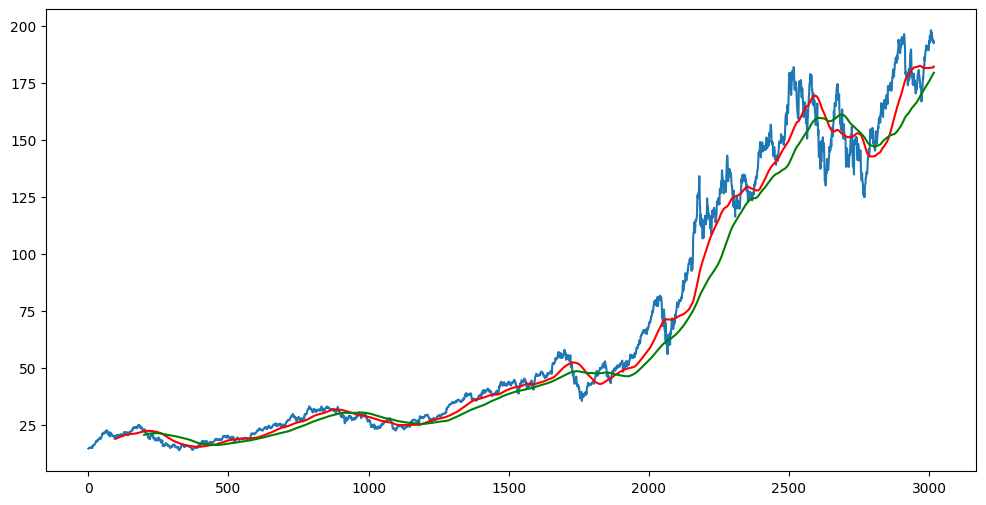

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [50]:
df.shape

(3018, 5)

In [51]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

In [52]:
data_testing

,Close
2112,79.527496
2113,79.562500
2114,79.485001
2115,80.462502
2116,80.834999
...,...
3013,193.600006
3014,193.050003
3015,193.149994
3016,193.580002


In [53]:
from sklearn.preprocessing import MinMaxScaler
scalar =  MinMaxScaler(feature_range=(0,1))


In [54]:
#data_testing_array = scalar.fit_transform(data_testing)
data_training_array = scalar.fit_transform(data_training)


In [55]:
X_train = []
y_train = []


for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)




In [56]:
X_train.shape

(2012, 100, 1)

In [57]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [60]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 120)              

In [63]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 22s 233ms/step - loss: 0.0240
Epoch 2/50
63/63 [==============================] - 15s 238ms/step - loss: 0.0062
Epoch 3/50
63/63 [==============================] - 15s 239ms/step - loss: 0.0045
Epoch 4/50
63/63 [==============================] - 15s 235ms/step - loss: 0.0043
Epoch 5/50
63/63 [==============================] - 14s 230ms/step - loss: 0.0043
Epoch 6/50
63/63 [==============================] - 15s 234ms/step - loss: 0.0048
Epoch 7/50
63/63 [==============================] - 14s 230ms/step - loss: 0.0041
Epoch 8/50
63/63 [==============================] - 15s 235ms/step - loss: 0.0033
Epoch 9/50
63/63 [==============================] - 14s 228ms/step - loss: 0.0033
Epoch 10/50
63/63 [==============================] - 15s 233ms/step - loss: 0.0032
Epoch 11/50
63/63 [==============================] - 15s 231ms/step - loss: 0.0031
Epoch 12/50
63/63 [==============================] - 15s 231ms/step - loss: 0.0034
Epoch 13/50
6

In [64]:
model.save('keras_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
data_testing.head()

,Close
2112,79.527496
2113,79.562500
2114,79.485001
2115,80.462502
2116,80.834999


In [66]:
past_100_days= data_training.tail(100)


In [69]:
final_df = pd.concat([past_100_days, data_testing],ignore_index = True)

In [70]:
final_df

,Close
0,75.087502
1,74.357498
2,74.949997
3,74.597504
4,75.797501
...,...
1001,193.600006
1002,193.050003
1003,193.149994
1004,193.580002


In [72]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.96507468],
       [0.96810253],
       [0.96070906]])

In [73]:
input_data.shape

(1006, 1)

In [74]:
X_test = []
y_test = []
for i in range(100,input_data.shape[0]): 
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [75]:
X_test,y_test = np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [77]:
# making predictions 

y_predicted = model.predict(X_test)

29/29 [==============================] - 3s 72ms/step


In [78]:
y_predicted.shape

(906, 1)

In [80]:
scale_factor = 1/scalar.scale_

In [83]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

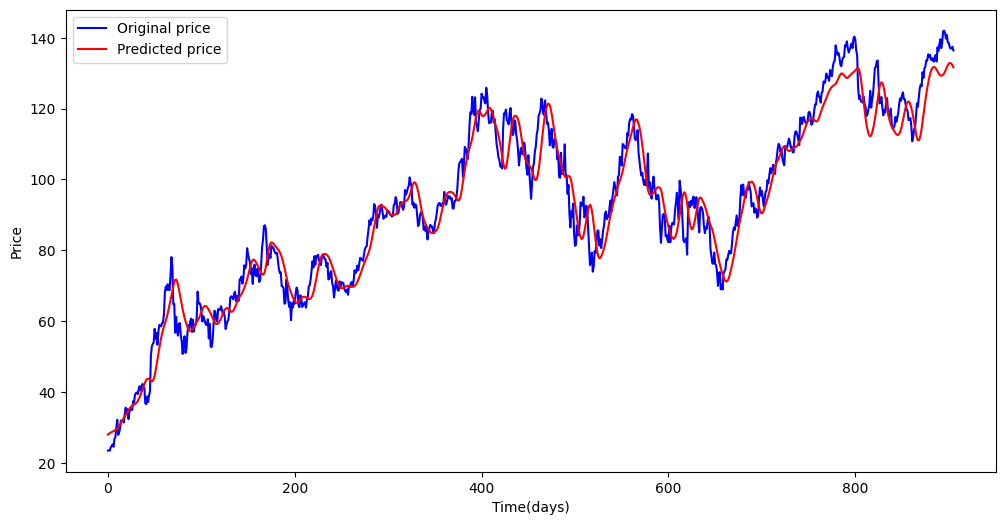

In [85]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted,'r',label = 'Predicted price')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.legend()
plt.show()